# Merkmal Korrelationen
## Allgemein


In [1]:
import pandas
import seaborn as sns
import os
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../daten/merkmale.csv")
featuresDf.describe()

,Zeitstempel in Unixzeit,Breitengrad,Laengengrad,Geschwindigkeit in km/h,Hoehe in m ueber WGS 84,Anzahl der Messwerte,Start des Zeitfensters in ns seit Start der JVM,Start der Messwerterfassung in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,Belichtungszeit in ns,...,Varianz X-Achse Beschleunigung in m/s^2,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Varianz Nick in rad,Varianz Roll in rad,Standardabweichung X-Achse Beschleunigung in m/s^2,Standardabweichung Y-Achse Beschleunigung in m/s^2,Standardabweichung Z-Achse Beschleunigung in m/s^2,Standardabweichung Nick in rad,Standardabweichung Roll in rad
count,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,...,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,1.521815e+12,53.611756,10.141385,15.431479,70.983613,19.335401,1.232928e+14,1.232927e+14,1.232928e+14,1.717044e+07,...,5.090925,40.109086,47.298581,0.453278,0.755017,1.843783,4.890581,5.664694,0.604631,0.617375
std,1.711999e+05,0.001963,0.004292,2.578698,2.540434,0.574053,1.712002e+11,1.712002e+11,1.712005e+11,5.915285e+06,...,9.928539,84.530317,74.631600,0.415298,1.384871,1.300870,4.024882,3.900985,0.296218,0.611603
min,1.521815e+12,53.608086,10.136243,6.012000,64.299440,14.000000,1.229923e+14,1.229923e+14,1.229924e+14,1.000184e+07,...,0.051570,0.293240,0.390830,0.004730,0.001030,0.227090,0.541520,0.625160,0.068770,0.032090
25%,1.521815e+12,53.610050,10.137212,14.256000,69.145140,19.000000,1.231447e+14,1.231447e+14,1.231448e+14,1.000184e+07,...,0.955515,5.312705,8.138980,0.129180,0.027425,0.977505,2.304930,2.852890,0.359415,0.165605
50%,1.521815e+12,53.612152,10.140454,15.768001,71.069275,19.000000,1.232957e+14,1.232956e+14,1.232957e+14,2.000368e+07,...,2.177540,13.362630,20.536700,0.327060,0.113760,1.475650,3.655490,4.531740,0.571890,0.337280
75%,1.521815e+12,53.613777,10.145028,17.208002,72.942380,20.000000,1.234378e+14,1.234377e+14,1.234378e+14,2.000368e+07,...,5.343015,33.826275,52.282975,0.663675,0.834570,2.311500,5.816035,7.230695,0.814660,0.913545
max,1.521815e+12,53.613907,10.149695,20.268002,77.023680,22.000000,1.235899e+14,1.235898e+14,1.235899e+14,2.999632e+07,...,190.706400,1037.005440,998.218210,2.811090,12.292420,13.809650,32.202570,31.594590,1.676630,3.506050


In [3]:
# Gibt die Spaltennamen aus
featuresDf.columns

Index(['Zeitstempel in Unixzeit', 'Breitengrad', 'Laengengrad',
       'Geschwindigkeit in km/h', 'Hoehe in m ueber WGS 84',
       'X-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2',
       'Z-Achse Beschleunigungswerte in m/s^2', 'Gier Messwerte in rad',
       'Nick Messwerte in rad', 'Roll Messwerte in rad',
       'Zeitstempel der Messwerte in ns', 'Anzahl der Messwerte',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Start der Belichtung in ns seit Start der JVM',
       'Belichtungszeit in ns',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Stopp der Messwerterfassung in Unixzeit',
       'Mittelwert X-Achse Beschleunigung in m/s^2',
       'Mittelwert Y-Achse Beschleunigung in m/s^2',
       'Mittelwert Z-Achse Beschleunigung in m/s^2', 'Mittelwert Nick in rad',
       'Mittelwert Roll in rad', 'Gier-Aenderung in rad',
    

## Geografische Koordinaten

### Einleitung
Durch einem matplotlib scatter plot kann die Beziehung von Längengrad zu Breitengrad dargestellt werden.   
Dies veranschaulicht die geografischen Koordinaten der erfassten Daten. Sobald die Belichtungszeit einer Aufnahme   
startet wird die letzte erfasste GPS Position abgespeichert. Der alpha Wert der Blauen Farbe gibt die Dichte von GPS Postionen an.

### Erwartung
Die GPS Koordinaten werden mit unterschiedlicher Häufigkeit erfasst. Dies hat mehrere Gründe. Bei einer geringen Geschwindikeit auf einem Weg   
werden die Koordinaten häufiger abgefragt als mit einer hohen Geschwindikeit, weil in einer kürzeren Zeit mehr Distanz zurückgelegt wird.   
Desweiteren werden Daten nur erfasst, wenn die Geschwindigkeit zwischen 5 km/h und 25 km/h liegt. Auf einer Wegstrecke   
kann es vorkommen, dass der Benutzer der Android App die Datenerfassung gestoppt hat oder die Anwendung abgestürzt ist.   
Nachdem das Smartphone in den Ruhemodus gekommen ist. Da der Nutzer inaktiv war wird die Erfassung der Daten auch pausiert.      
TODO Verweis das GPS koordinaten ungenau sind

### Ergebnis

Siehe Plot "GPS Koordinaten".

### Auswertung

Text(0.5,1,'GPS Koordinaten')

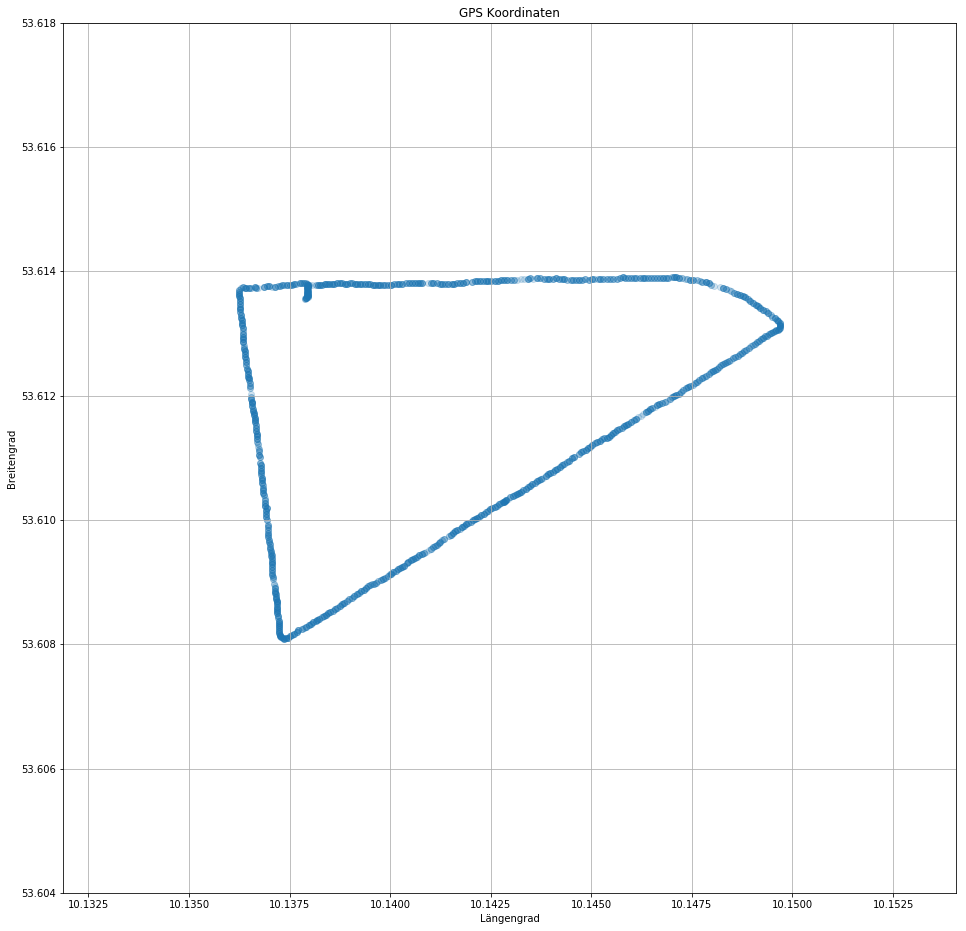

In [9]:
fig = plt.figure(figsize=(16,16))
ax  = fig.add_subplot(111)
ax.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], alpha = 0.2)
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.grid()
ax.set_title("GPS Koordinaten")

## Übersicht von Korrelationen

### Einleitung 

Die folgenden Plots bieten eine Übersicht über die Beziehungen der Merkmale zueinander.

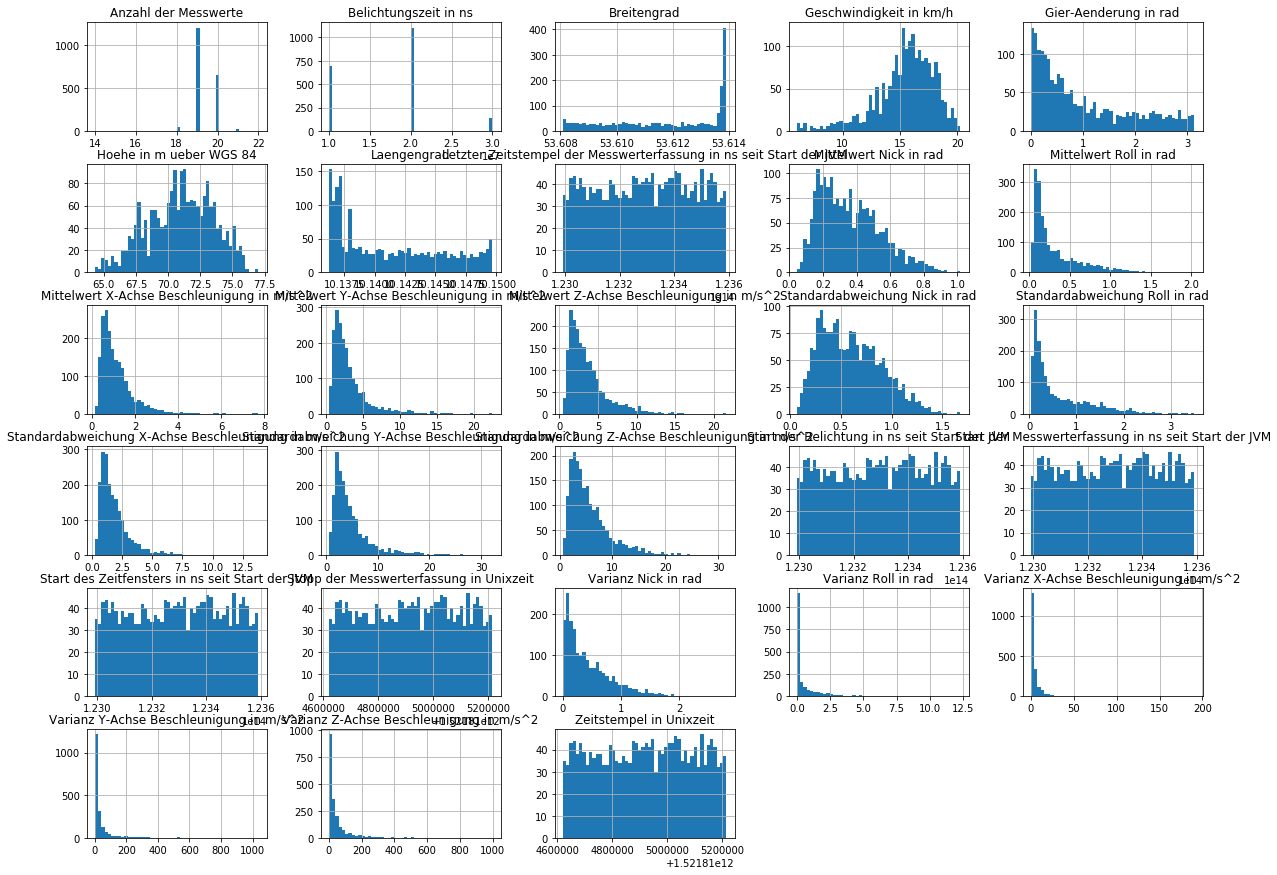

In [6]:
# Als Histogramdiagramm werden alls Merkmale dargestellt. 
# Dadurch ist ein erster Eindruck über den Wertereich der Daten möglich
featuresDf.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
accDf = featuresDf[['X-Achse Beschleunigungswerte in m/s^2','Y-Achse Beschleunigungswerte in m/s^2','Z-Achse Beschleunigungswerte in m/s^2','Mittelwert X-Achse Beschleunigung in m/s^2',
                    'Mittelwert Y-Achse Beschleunigung in m/s^2','Mittelwert Z-Achse Beschleunigung in m/s^2','Varianz X-Achse Beschleunigung in m/s^2',
                    'Varianz Y-Achse Beschleunigung in m/s^2','Varianz Z-Achse Beschleunigung in m/s^2',
                    'Standardabweichung X-Achse Beschleunigung in m/s^2','Standardabweichung Y-Achse Beschleunigung in m/s^2',
                    'Standardabweichung Z-Achse Beschleunigung in m/s^2']]
accDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 12 columns):
X-Achse Beschleunigungswerte in m/s^2                 1935 non-null object
Y-Achse Beschleunigungswerte in m/s^2                 1935 non-null object
Z-Achse Beschleunigungswerte in m/s^2                 1935 non-null object
Mittelwert X-Achse Beschleunigung in m/s^2            1935 non-null float64
Mittelwert Y-Achse Beschleunigung in m/s^2            1935 non-null float64
Mittelwert Z-Achse Beschleunigung in m/s^2            1935 non-null float64
Varianz X-Achse Beschleunigung in m/s^2               1935 non-null float64
Varianz Y-Achse Beschleunigung in m/s^2               1935 non-null float64
Varianz Z-Achse Beschleunigung in m/s^2               1935 non-null float64
Standardabweichung X-Achse Beschleunigung in m/s^2    1935 non-null float64
Standardabweichung Y-Achse Beschleunigung in m/s^2    1935 non-null float64
Standardabweichung Z-Achse Beschleunigung in m/s^2    1935 n

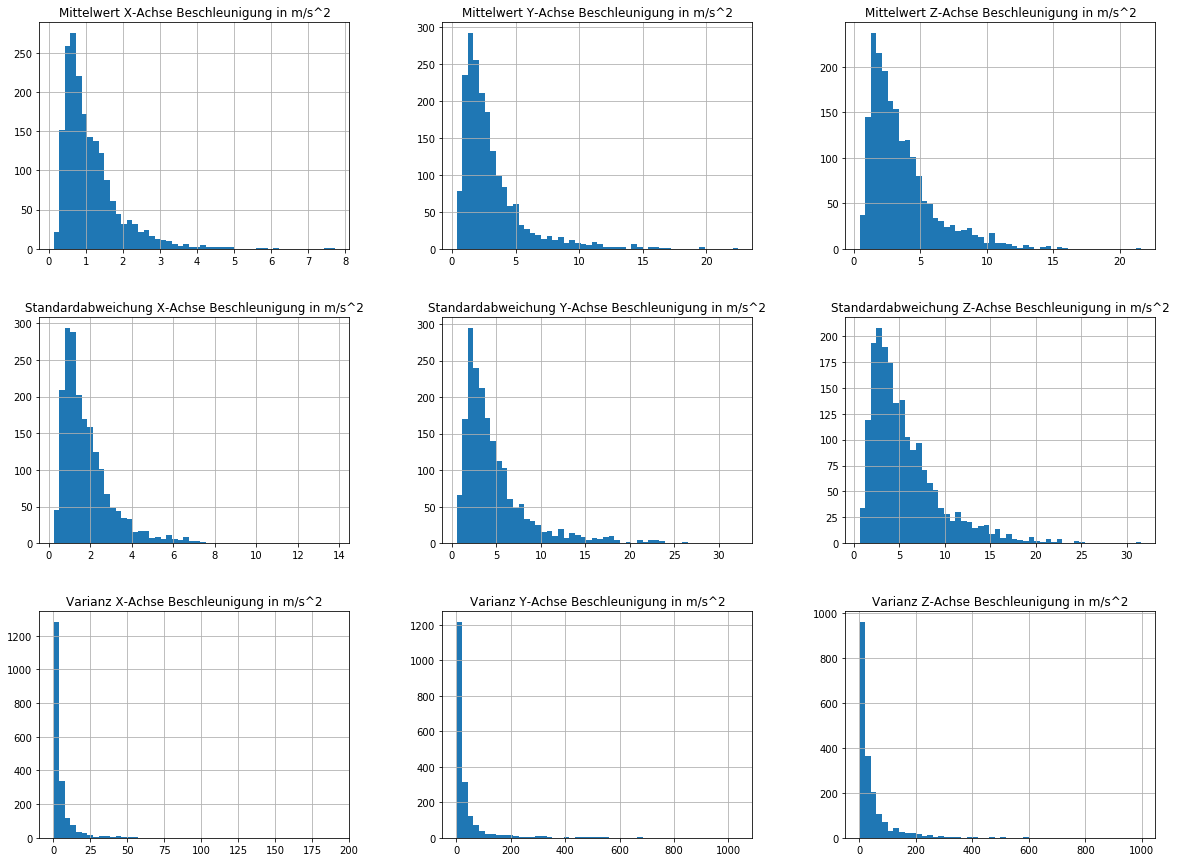

In [13]:
accDf.hist(bins=50, figsize=(20,15))
plt.show()

### Seaborn pairplot

Mit der Seaborn Funktion pairplot können Variablen gegenübergestellt werden. Dies ist interessant,um einen      
ersten Überblick zu bekommen. In jeder Reihe des Gitter-Plots wird eine Variable geplottet und mit    
den anderen Variablen in dem Spalten des Rasters gegenübergestellt.    
Dabei werden die Diagonalen Achsen als Blockdiagramm dargestellt, welche das Verteilungsverhältnis der    
einzelnen Variablen zeigt.  

### Einleitung Beschleunigungssensordaten

In den folgenden Diagrammen wird die Geschwindigkeit gegen die berechneten Merkmale aus den Beschleunigungssensordaten der X, Y und   
Z-Achse innerhalb eines Zeitfensters dargestellt. Berechnet wurden der Mittelwert, Varianz und Standardabweichung der Achsen.    

### Erwartung

Erwartet wird das der Mittelwert, Varianz und Standardabweichung mit zunehmender Geschwindigkeit tendenziell auch zunimmt.   
Eine Abweichung dieser Annahme müsste sich durch verschiedene Oberflächenqualitäten des Weges ergeben. Eine Wegstrecke mit   
vielen Unebenheiten müsste relativ hohe Werte ergeben auch bei einer geringen Geschwindikeit.  


### Ergebnis

Siehe Diagramme.

### Auswertung

Mit 49832 Merkmalen die 

In [14]:
featuresDf.shape

(1935, 35)

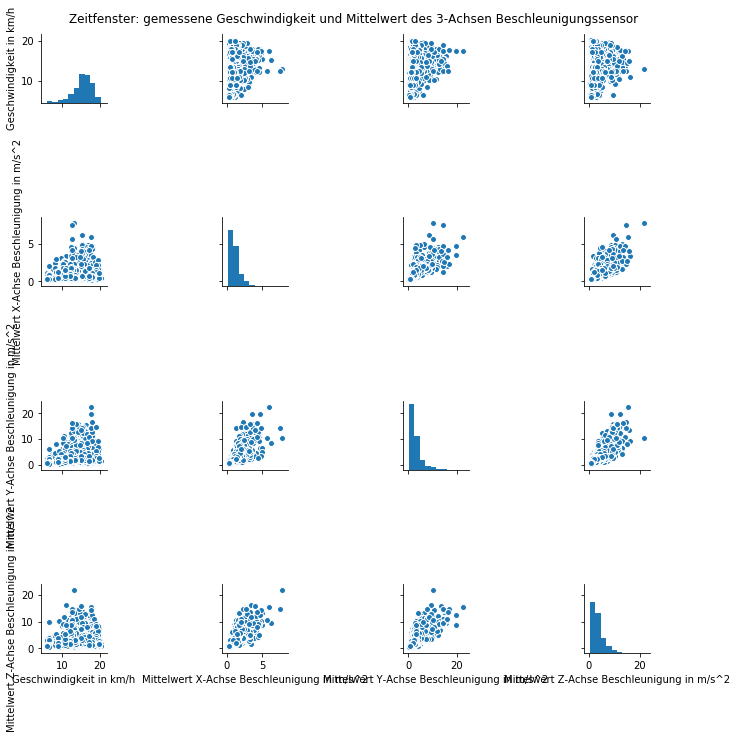

In [21]:
# Die Geschwindigkeit wird den Mittelwert der Beschleunigungssensordaten X,Y,Z gegenübergestellt.
# Hier werden auch die Mittelwerte miteinander geplottet.
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert X-Achse Beschleunigung in m/s^2',
                             'Mittelwert Y-Achse Beschleunigung in m/s^2',
                             'Mittelwert Z-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(10,10)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Mittelwert des 3-Achsen Beschleunigungssensor")
g.savefig("Zeitfenster_geschwindigkeit_mittelwert_3-Achsen-Beschleunigungssensor_mit_abs.png")

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Mittelwert der Z-Achse des Beschleunigungssensor')

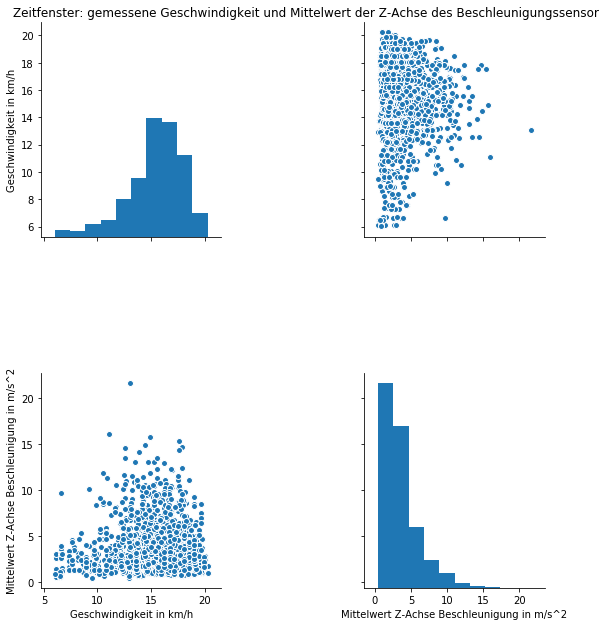

In [22]:
# Geschwindigkeit und Mittelwert der Beschleunigungssensor Z-Achsen Messwerte eines Zeitfensters
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert Z-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(10,10)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Mittelwert der Z-Achse des Beschleunigungssensor")

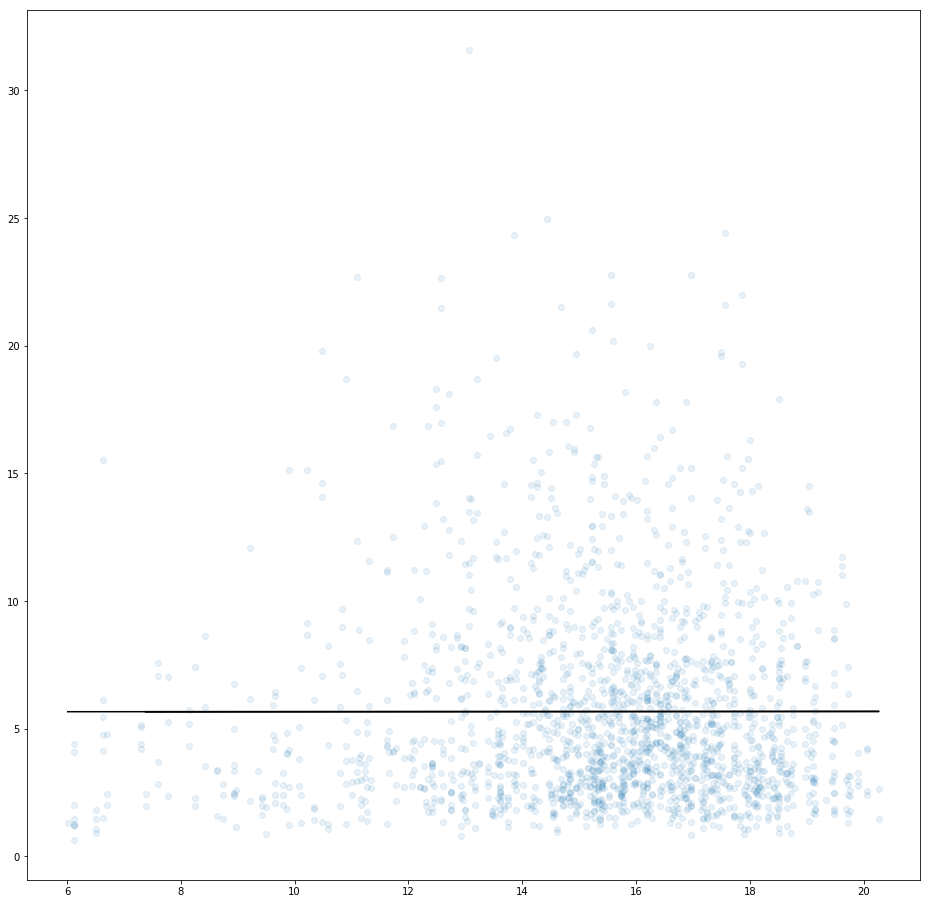

In [39]:
from scipy.stats import linregress
plt.figure(figsize=(16,16))
slope, intercept, r_value, p_value, std_err = linregress(featuresDf['Geschwindigkeit in km/h'],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2']) 
plt.scatter(featuresDf['Geschwindigkeit in km/h'],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'], label='original data', alpha = 0.1)
plt.plot(featuresDf['Geschwindigkeit in km/h'], intercept + slope*featuresDf['Geschwindigkeit in km/h'], 'k', label='fitted line')

In [38]:
slope

0.0025163581829068513

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Varianz der Z-Achse des Beschleunigungssensor')

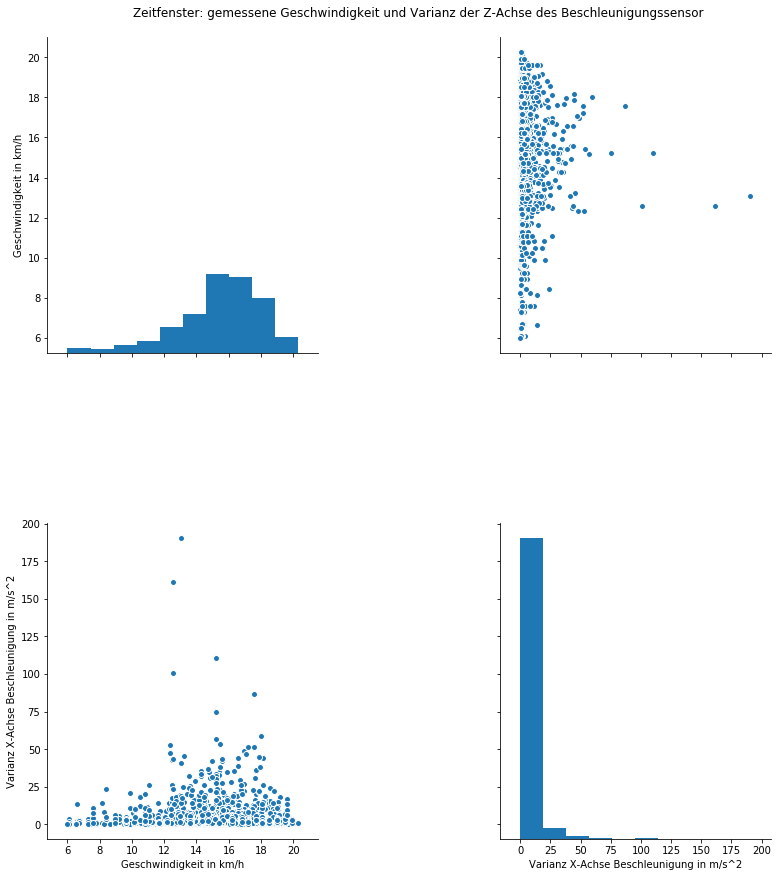

In [36]:
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Varianz X-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(14,14)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Varianz der Z-Achse des Beschleunigungssensor")

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Standardabweichung der Z-Achse des Beschleunigungssensor')

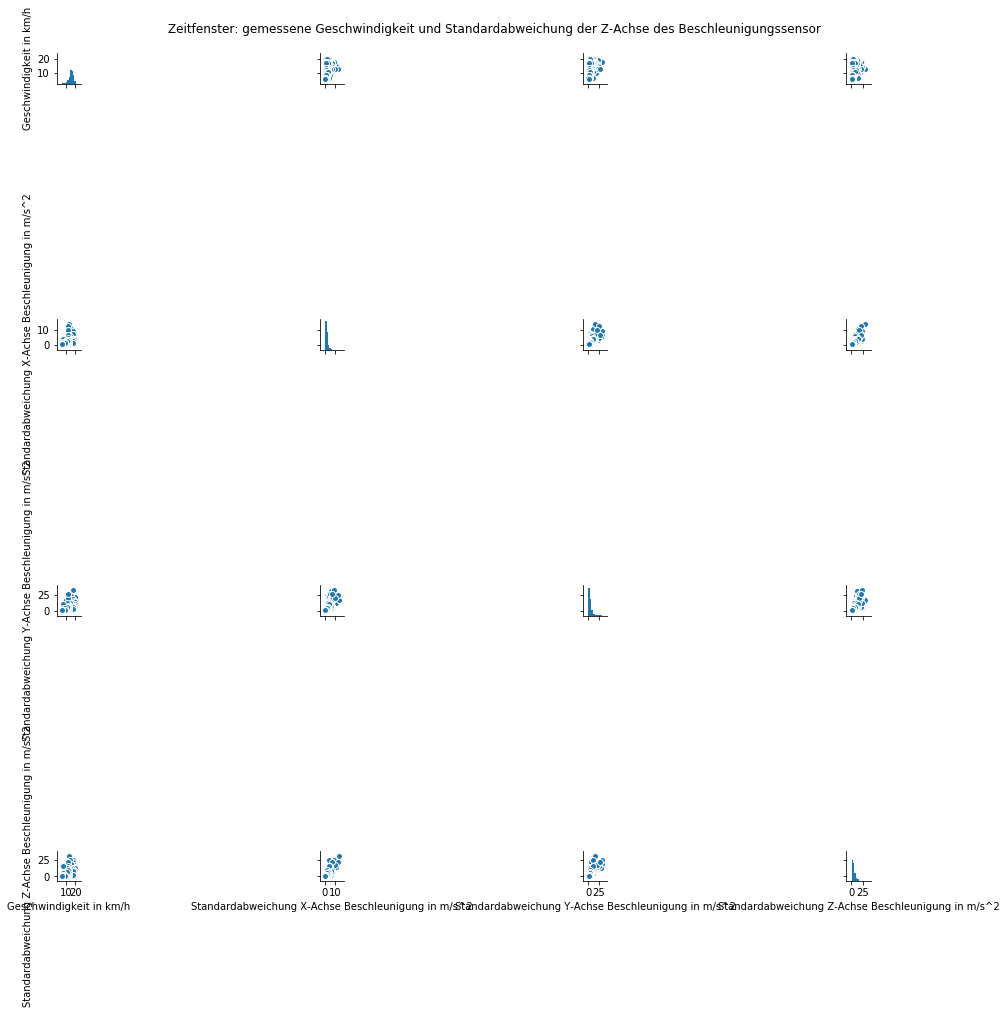

In [40]:
# Standardabweichung der Beschleunigungsensorachsen
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Standardabweichung X-Achse Beschleunigung in m/s^2',
                             'Standardabweichung Y-Achse Beschleunigung in m/s^2','Standardabweichung Z-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(14,14)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Standardabweichung der Z-Achse des Beschleunigungssensor")

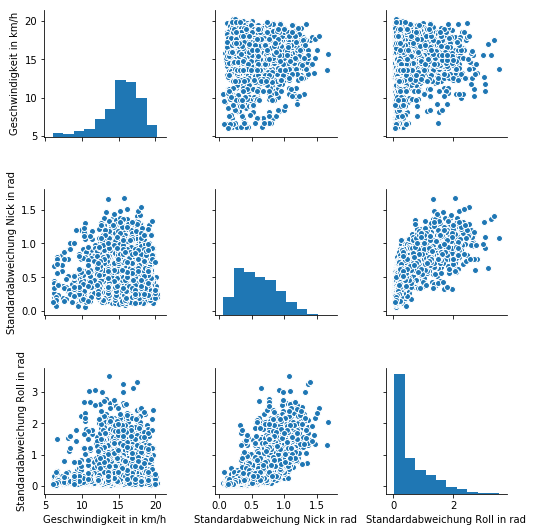

In [41]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Standardabweichung Nick in rad','Standardabweichung Roll in rad']])

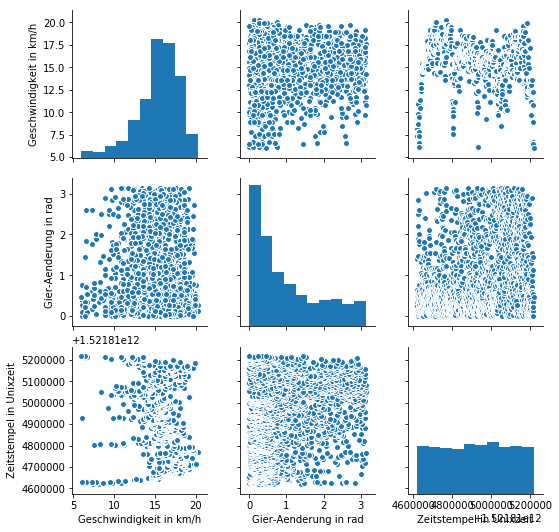

In [42]:
# Azimuth gibt die Winkeländerung in Rad an von Start der Datenerfassung bis zum Stopp dieser. 
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Gier-Aenderung in rad','Zeitstempel in Unixzeit']])

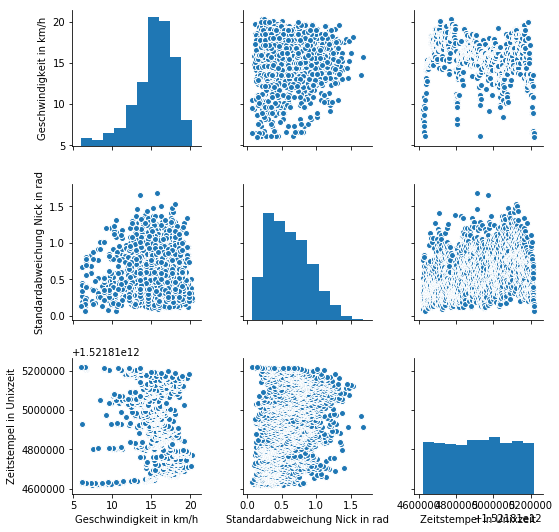

In [44]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Standardabweichung Nick in rad','Zeitstempel in Unixzeit']])

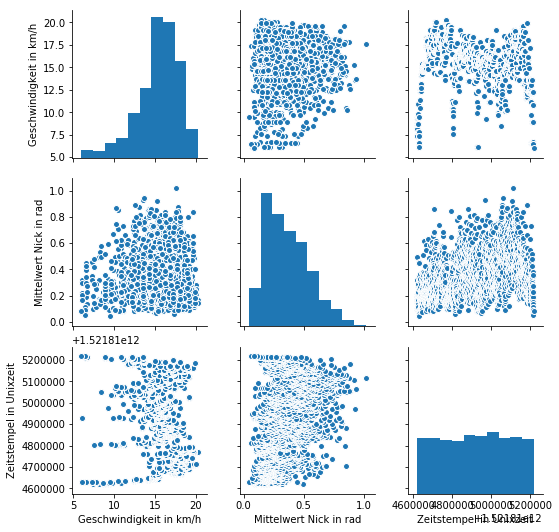

In [46]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert Nick in rad','Zeitstempel in Unixzeit']])

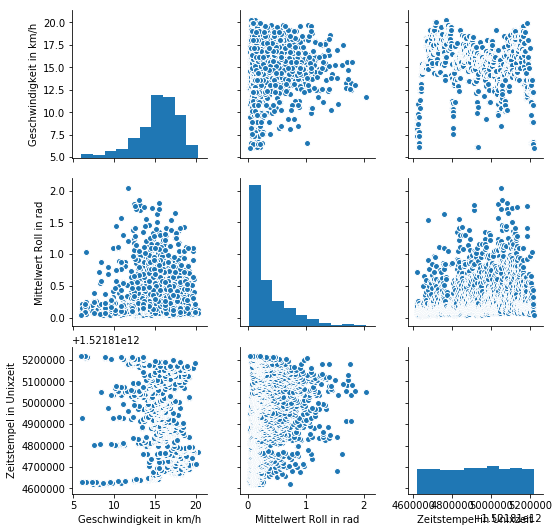

In [48]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert Roll in rad','Zeitstempel in Unixzeit']])

In [49]:
# Zusammenhänge werden berechnet mit der Person Methode
corrMatrix = featuresDf.corr()
corrMatrix['Geschwindigkeit in km/h'].sort_values()

Start der Messwerterfassung in ns seit Start der JVM                 -0.125221
Start des Zeitfensters in ns seit Start der JVM                      -0.125218
Zeitstempel in Unixzeit                                              -0.125217
Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM   -0.125217
Stopp der Messwerterfassung in Unixzeit                              -0.125217
Start der Belichtung in ns seit Start der JVM                        -0.125216
Belichtungszeit in ns                                                -0.115022
Hoehe in m ueber WGS 84                                              -0.047325
Varianz Roll in rad                                                  -0.041328
Mittelwert Roll in rad                                               -0.033509
Varianz Z-Achse Beschleunigung in m/s^2                              -0.026118
Varianz X-Achse Beschleunigung in m/s^2                              -0.020882
Gier-Aenderung in rad                               

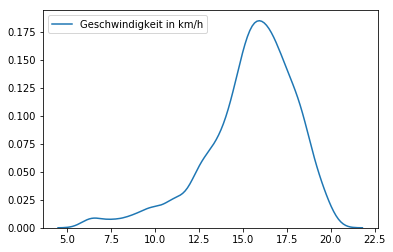

In [50]:
sns.kdeplot(featuresDf['Geschwindigkeit in km/h'])

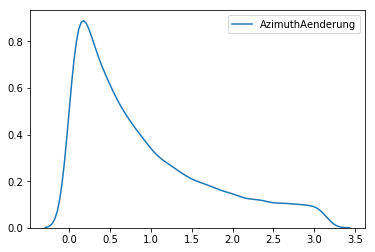

In [20]:
sns.kdeplot(featuresDf['AzimuthAenderung'])

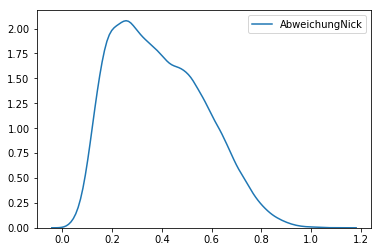

In [21]:
sns.kdeplot(featuresDf['AbweichungNick'])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


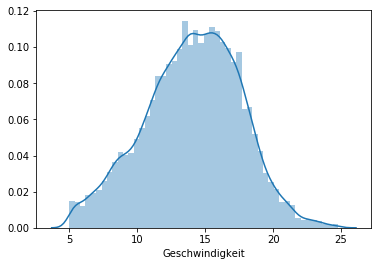

In [22]:
sns.distplot(featuresDf['Geschwindigkeit'])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


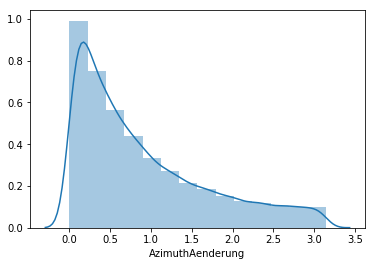

In [23]:
sns.distplot(featuresDf['AzimuthAenderung'],  bins=14)

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


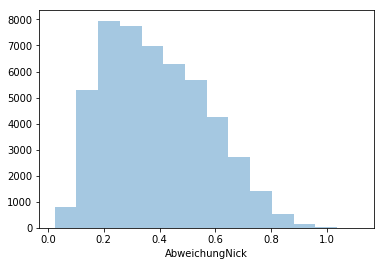

In [24]:
sns.distplot(featuresDf['AbweichungNick'], bins=14, kde=False)